In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = 'constant_results.csv'
df = pd.read_csv(filename)
df.head()

,compute_type,num_workers,batch_size,experiment_type,arrival_rate,num_requests,total_time,successful_requests,average_time_per_request,throughput,average_latency,min_latency,max_latency,latency_90,latency_95,latency_99,model_id,avg_queue_time,avg_execution_time
0,processes,1,1,constant,0,64,42.791627,64,0.668619,1.495620,21.733827,0.744318,42.660281,38.666937,40.664234,42.660281,stabilityai/sd-turbo,21.067572,0.666255
1,processes,1,2,constant,0,64,25.749437,64,0.402335,2.485491,13.212117,0.860773,25.550366,23.162400,24.752342,25.550366,stabilityai/sd-turbo,12.414149,0.797968
2,processes,1,4,constant,0,64,22.062540,64,0.344727,2.900845,11.537017,1.376633,21.684334,20.328325,21.681768,21.684334,stabilityai/sd-turbo,10.183283,1.353734
3,processes,1,8,constant,0,64,20.791972,64,0.324875,3.078111,11.244912,2.532144,19.960679,19.956094,19.958145,19.960679,stabilityai/sd-turbo,8.756437,2.488475
4,processes,1,16,constant,0,64,20.631701,64,0.322370,3.102023,11.960436,4.839455,19.084321,19.080061,19.081511,19.084321,stabilityai/sd-turbo,7.215009,4.745427


In [4]:
df["eff_batch_size"] = df["batch_size"] * df["num_workers"]
df['config'] = df.apply(lambda row: f"{row['compute_type']}-{row['num_workers']}workers", axis=1)


# Poisson Arrival Time

In [8]:
def visualize(model_id):
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='throughput', hue='config', data=df[
        (df['experiment_type'] == 'constant') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Throughput vs. Batch Size, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Throughput (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='average_latency', hue='config', data=df[
        (df['experiment_type'] == 'constant') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Latency Avg vs. Batch Size, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Latency Avg (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



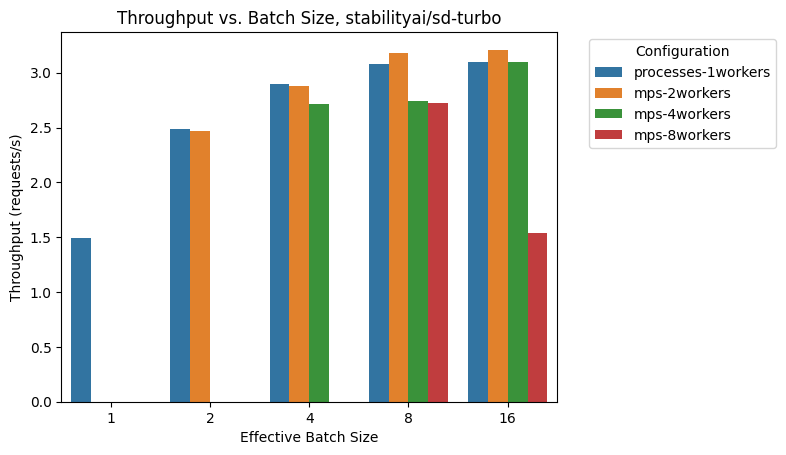

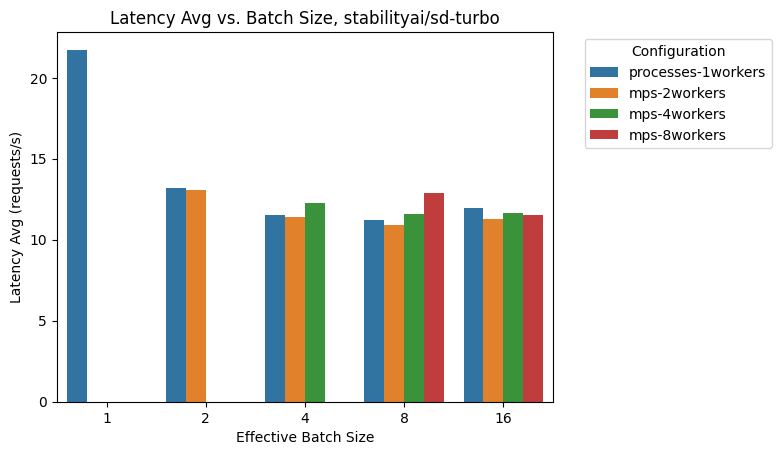

In [11]:
visualize("stabilityai/sd-turbo")

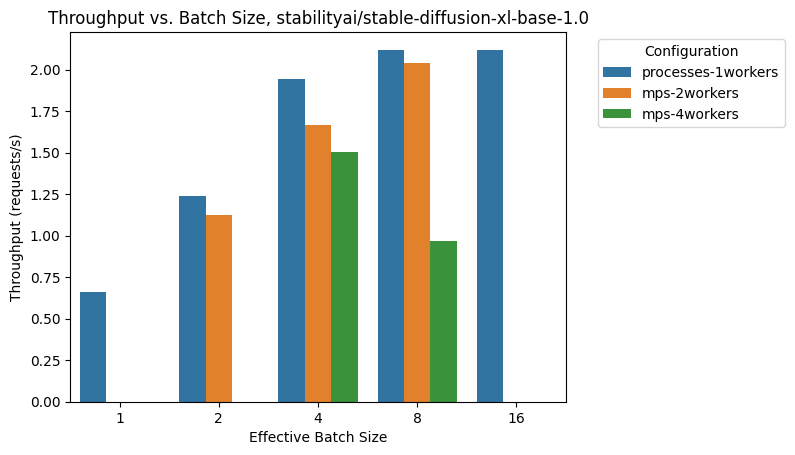

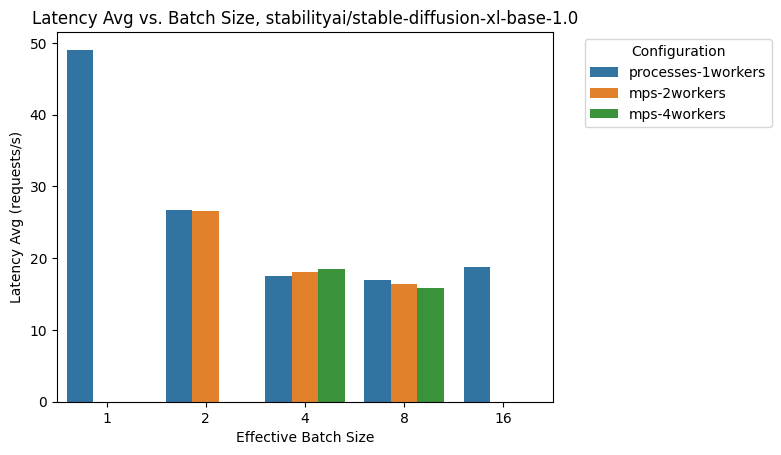

In [12]:
visualize("stabilityai/stable-diffusion-xl-base-1.0")